In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
main_df_train = pd.read_csv("Data/General_ds_cleaned.csv")

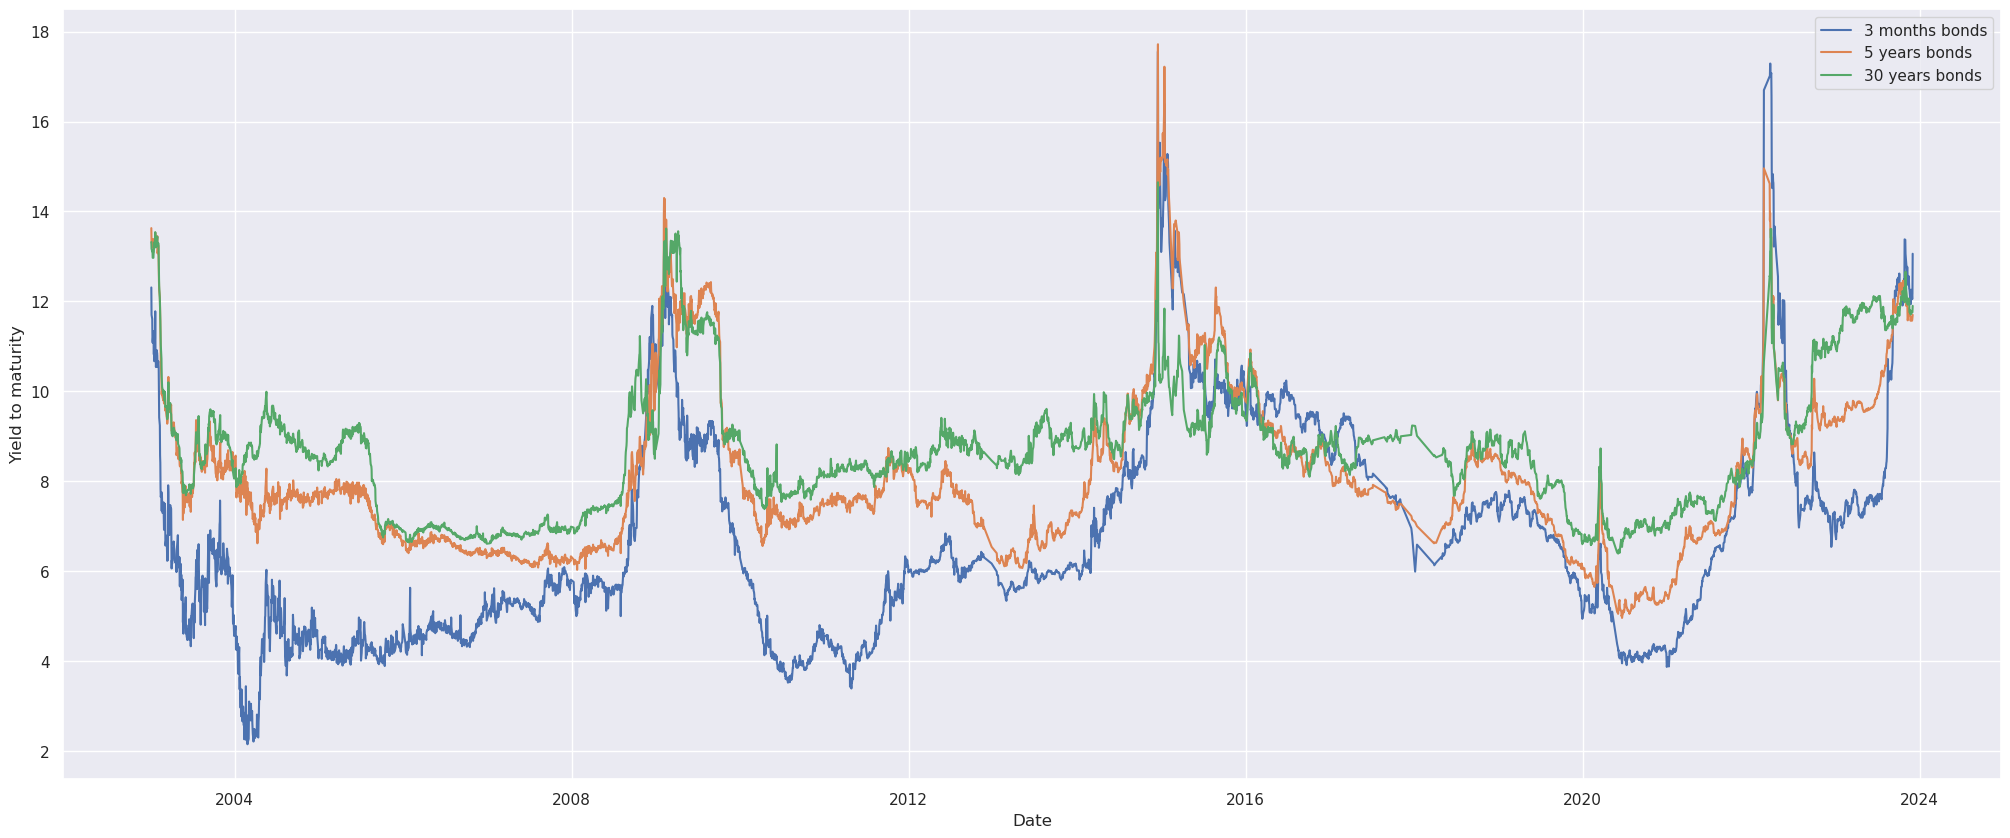

In [4]:
sns.set(rc={"figure.figsize":(25, 10)})

plt.plot(pd.to_datetime(main_df_train["date"]), main_df_train["0.5"], label="3 months bonds")
plt.plot(pd.to_datetime(main_df_train["date"]), main_df_train["5.0"], label="5 years bonds")
plt.plot(pd.to_datetime(main_df_train["date"]), main_df_train["30.0"], label="30 years bonds")
plt.legend()
plt.ylabel("Yield to maturity")

plt.xlabel("Date")
plt.savefig("YTMp.pdf")

In [5]:
def plotZCY(beta0, beta1, beta2, tau):
    def Pr(time):
        return (beta0 + (beta1 + beta2) * (tau / time) * (1 - np.exp(- time / tau)) - beta2 * np.exp(- time / tau))/100
    
    return Pr

In [6]:
coefs = main_df_train[["date","beta0", "beta1", "beta2", "tau"]]
# coefs["date"] = pd.to_datetime(coefs["date"])

In [7]:
coefs["date"][2]

'2003-01-08'

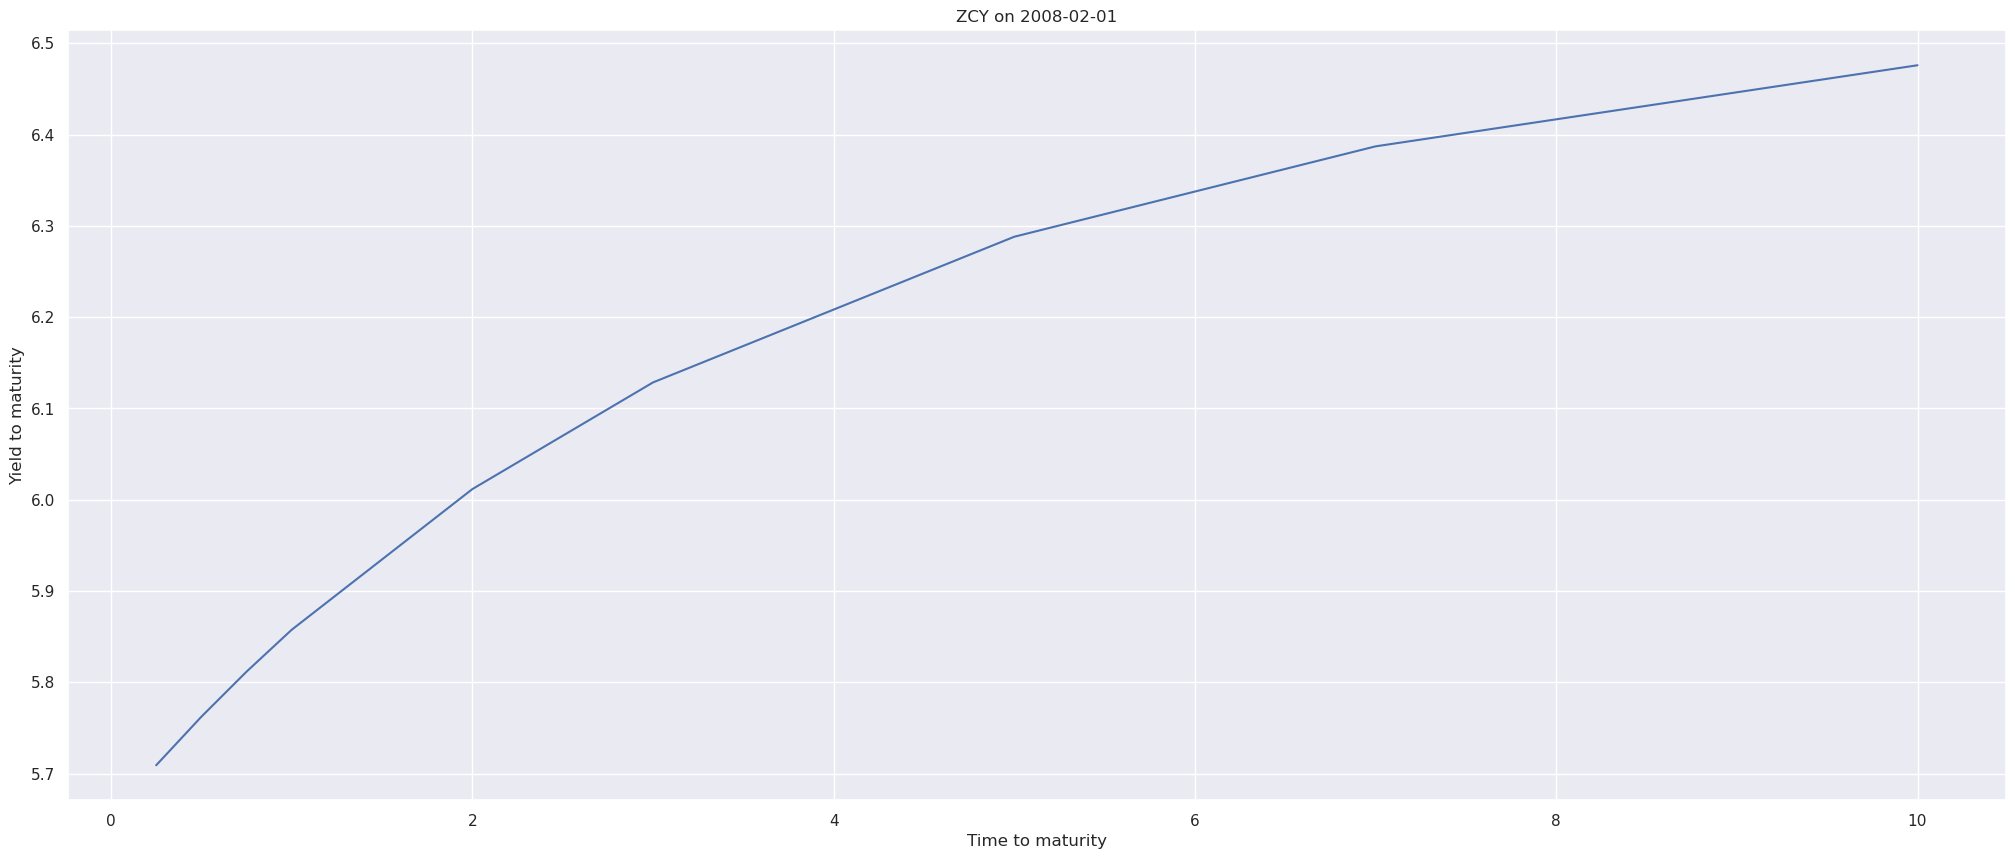

In [8]:
sns.set(rc={"figure.figsize":(25, 10)})

times = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

p1=plotZCY(670.812416, -105.629480, 0.000338, 2.222611)
plt.plot(times, p1(times), label="ZCY in 2008-02-01")
plt.ylabel("Yield to maturity")
plt.xlabel("Time to maturity")
plt.title("ZCY on 2008-02-01")
plt.savefig("ZCY1p.pdf")

In [9]:
ytm = main_df_train[["Y025","0.5","0.75","1.0","2.0","3.0","5.0","7.0","10.0","15.0","20.0","30.0"]]

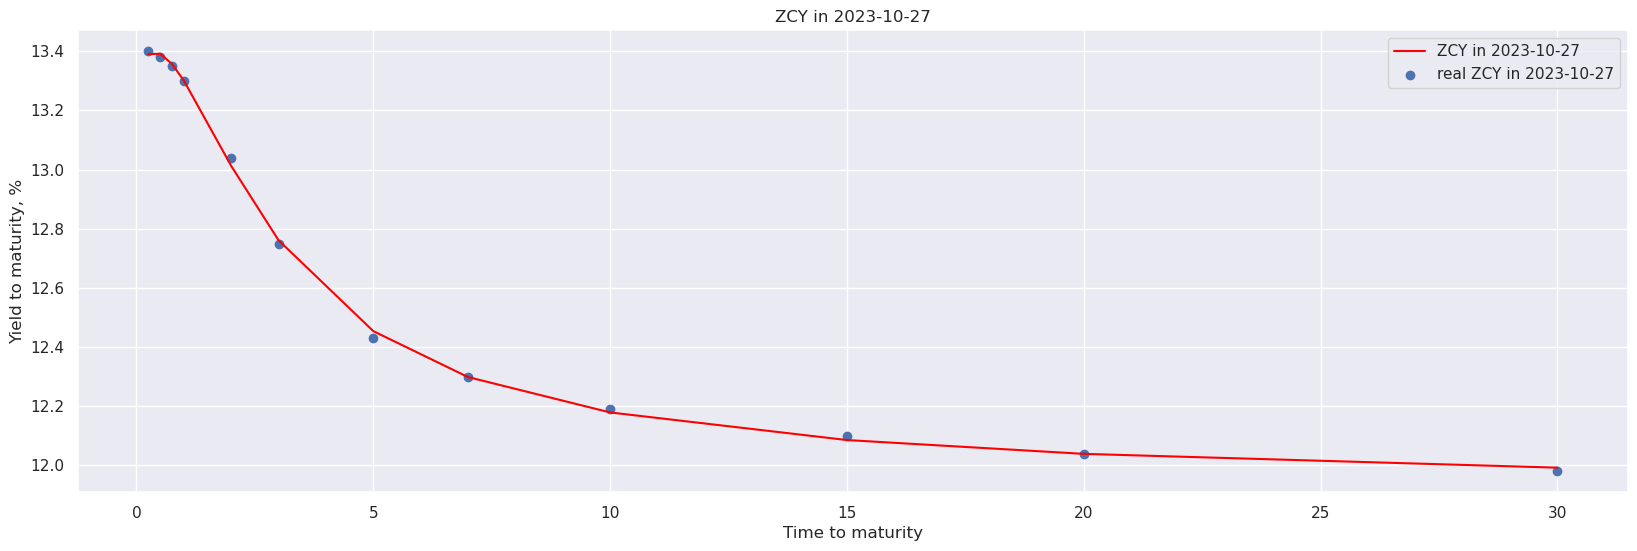

In [10]:
sns.set(rc={"figure.figsize":(20, 6)})

times = np.array([0.25,0.5,0.75,1.0,2.0,3.0,5.0,7.0,10.0,15.0,20.0,30.0])

i1 = 4900
i2 = 1000

fig, axs = plt.subplots(1,1, sharex=True)

p1=plotZCY(coefs["beta0"][i1], coefs["beta1"][i1], coefs["beta2"][i1], coefs["tau"][i1])
axs.plot(times, p1(times), color="red",label="ZCY in "+ coefs["date"][i1])
axs.scatter(times, np.array(ytm.iloc[i1]), label="real ZCY in " + coefs["date"][i1])
axs.set_ylabel("Yield to maturity, %")
axs.set_title("ZCY in " + coefs["date"][i1])
axs.legend()

# p1=plotZCY(coefs["beta0"][i2], coefs["beta1"][i2], coefs["beta2"][i2], coefs["tau"][i2])
# axs[1].plot(times, p1(times), label="ZCY in 10.11.2023", color="red")
# axs[1].set_ylabel("Yield to maturity, %")
# axs[1].set_title("ZCY on " + coefs["date"][i2])
# axs[1].scatter(times, np.array(ytm.iloc[i2]), label="real ZCY in 2008-02-01")

plt.legend()
plt.xlabel("Time to maturity")
plt.savefig("ZCYp.pdf")
plt.show()

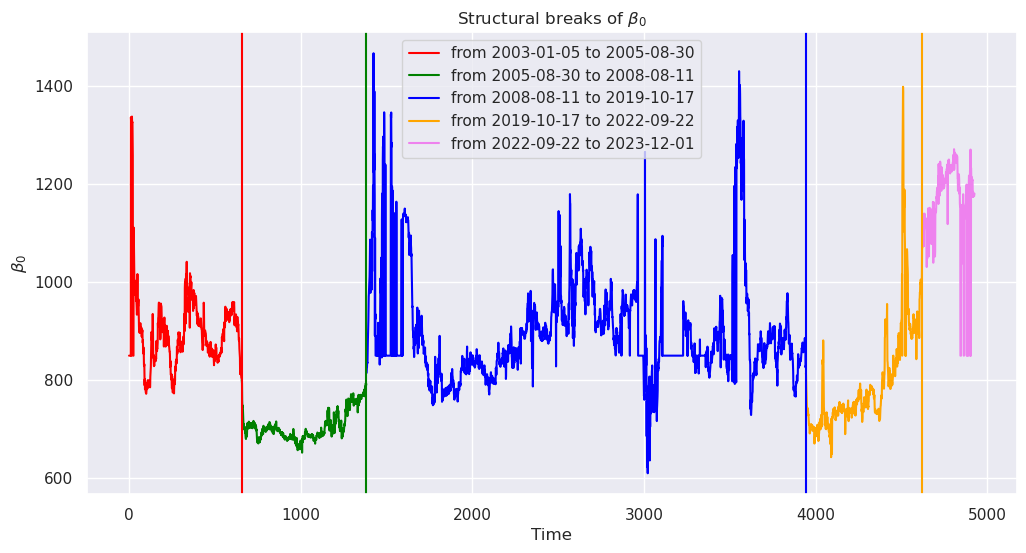

In [11]:
sns.set(rc={"figure.figsize":(12, 6)})

times = np.array([0.25,0.5,0.75,1.0,2.0,3.0,5.0,7.0,10.0,15.0,20.0,30.0])

fig, axs = plt.subplots(1,1, sharex=True)

axs.plot(coefs["beta0"][1:657], color="red", label=("from " + coefs["date"][1] + " to " + coefs["date"][657]))
axs.plot(coefs["beta0"][657:1384], color="green", label=("from " + coefs["date"][657] + " to " + coefs["date"][1384])) 
axs.plot(coefs["beta0"][1384:3943], color="blue", label=("from " + coefs["date"][1384] + " to " + coefs["date"][3943]))
axs.plot(coefs["beta0"][3943:4622], color="orange", label=("from " + coefs["date"][3943] + " to " + coefs["date"][4622]))
axs.plot(coefs["beta0"][4622:], color="violet", label=("from " + coefs["date"][4622] + " to " + coefs["date"][4925]))
axs.set_ylabel(r"$\beta_0$")
axs.set_title("Structural breaks of " + r"$\beta_0$")
axs.axvline(x=657, color="red")
axs.axvline(x=1384, color="green")
axs.axvline(x=3943, color="blue")
axs.axvline(x=4622, color="orange")
axs.legend()

# p1=plotZCY(coefs["beta0"][i2], coefs["beta1"][i2], coefs["beta2"][i2], coefs["tau"][i2])
# axs[1].plot(times, p1(times), label="ZCY in 10.11.2023", color="red")
# axs[1].set_ylabel("Yield to maturity, %")
# axs[1].set_title("ZCY on " + coefs["date"][i2])
# axs[1].scatter(times, np.array(ytm.iloc[i2]), label="real ZCY in 2008-02-01")

plt.legend()
plt.xlabel("Time")
plt.savefig("StrBreaks.pdf")
plt.show()

In [119]:
coefs["date"][4622]

'2022-09-22'